In [1]:
import pickle
import scipy
import scipy.io
import os
import numpy as np
import scanpy as sc
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [2]:
adata = sc.read_h5ad("../../data_/cohort2.h5ad")
adata

AnnData object with n_obs × n_vars = 139848 × 33417
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'percent.mito', 'meanCount_RNA', 'meanCount_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'demultID', 'experiment', 'cartridge', 'ID', 'sample', 'abseq', 'date_of_sampling', 'donor', 'cells', 'purification', 'nCount_AB', 'nFeature_AB', 'group_4', 'group', 'diagnosis', 'onset_of_symptoms', 'outcome', 'oxygen', 'highest_WHO_classification', 'primary_complaint', 'bacterial_superinfection', 'medication', 'comorbidities', 'age', 'sex', 'days_after_onset', 'disease_stage', 'who_per_sample', 'group_per_sample', 'glucocorticoids', 'covid19_therapy', 'leukocyte_counts', 'neutrophil_counts', 'lymphocyte_counts', 'monocyte_counts', 'eosinophil_counts', 'basophil_counts', 'imm_granulocyte_counts', 'thrombocyte_counts', 'pCT', 'CRP', 'IL6', 'group_4_per_sample', 'percent.hb', 'group_per_sample_per_stag

In [3]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# sc.pl.highly_variable_genes(adata)

In [4]:
adata

AnnData object with n_obs × n_vars = 139848 × 33417
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'percent.mito', 'meanCount_RNA', 'meanCount_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'demultID', 'experiment', 'cartridge', 'ID', 'sample', 'abseq', 'date_of_sampling', 'donor', 'cells', 'purification', 'nCount_AB', 'nFeature_AB', 'group_4', 'group', 'diagnosis', 'onset_of_symptoms', 'outcome', 'oxygen', 'highest_WHO_classification', 'primary_complaint', 'bacterial_superinfection', 'medication', 'comorbidities', 'age', 'sex', 'days_after_onset', 'disease_stage', 'who_per_sample', 'group_per_sample', 'glucocorticoids', 'covid19_therapy', 'leukocyte_counts', 'neutrophil_counts', 'lymphocyte_counts', 'monocyte_counts', 'eosinophil_counts', 'basophil_counts', 'imm_granulocyte_counts', 'thrombocyte_counts', 'pCT', 'CRP', 'IL6', 'group_4_per_sample', 'percent.hb', 'group_per_sample_per_stag

In [5]:
np.unique(adata.obs['new_order'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [6]:
adata_raw = adata
# adata = adata[:, adata.var.highly_variable]

In [7]:
# adata.raw[:, adata.var.index]

In [8]:
# adata1.raw.var.index

In [2]:
adata1 = sc.read_h5ad("../../data_/cohort1.h5ad")
sc.pp.normalize_total(adata1, target_sum=1e4)
sc.pp.log1p(adata1)
adata1_raw = adata1
# idx = adata1.var.index.isin(adata.var.index)
# adata1 = adata1[:, idx]


In [4]:
samples = np.unique(adata1.obs.SampleID[adata1.obs.Condition != 'Control'])
samples

array(['11_d0', '12_d0', '12_d7', '13_d0', '13_d7', '16_d0', '198_d18',
       '199_d8', '1_d0', '1_d4', '1_d9', '204_d15', '20_d0', '214_d18',
       '21_d0', '2_d0', '2_d6', '3_d0', '3_d5', '52_d18', '53_d18',
       '5_d0', '5_d5', '8_d0', '8_d7', '9_d0', '9_d7'], dtype=object)

In [10]:
adata_c=adata.var.index
adata1_c=adata1.var.index
adata1_c

Index(['AL627309.1', 'AP006222.2', 'RP11-206L10.2', 'RP11-206L10.9',
       'LINC00115', 'NOC2L', 'KLHL17', 'PLEKHN1', 'RP11-54O7.17', 'HES4',
       ...
       'AF127936.9', 'AP000223.42', 'AP001059.6', 'AP001059.7', 'KB-68A7.1',
       'AP001505.10', 'RP1-101D8.1', 'BX004987.4', 'AC145212.4', 'AC145212.2'],
      dtype='object', length=46584)

In [11]:
le = LabelEncoder()

In [17]:
adata = adata_raw
adata1 = adata1_raw
# adata = adata[adata.obs.new_order.isin([5,6]),:]
# adata1 = adata1[adata1.obs["new.id"].isin([5,6]),:]

In [12]:
adata

AnnData object with n_obs × n_vars = 139848 × 33417
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'percent.mito', 'meanCount_RNA', 'meanCount_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'demultID', 'experiment', 'cartridge', 'ID', 'sample', 'abseq', 'date_of_sampling', 'donor', 'cells', 'purification', 'nCount_AB', 'nFeature_AB', 'group_4', 'group', 'diagnosis', 'onset_of_symptoms', 'outcome', 'oxygen', 'highest_WHO_classification', 'primary_complaint', 'bacterial_superinfection', 'medication', 'comorbidities', 'age', 'sex', 'days_after_onset', 'disease_stage', 'who_per_sample', 'group_per_sample', 'glucocorticoids', 'covid19_therapy', 'leukocyte_counts', 'neutrophil_counts', 'lymphocyte_counts', 'monocyte_counts', 'eosinophil_counts', 'basophil_counts', 'imm_granulocyte_counts', 'thrombocyte_counts', 'pCT', 'CRP', 'IL6', 'group_4_per_sample', 'percent.hb', 'group_per_sample_per_stag

In [12]:
adata1_x=adata1.X
adata_x=adata.X

In [13]:
who =np.array([['1','2','3','5','52','53','204','214','8','9','11','12','13','16','20','21','198','199'],[3,3,3,3,4,4,3,3,
                                                                                                       7,7,5,7,7,7,7,6,6,7]]).transpose()


In [14]:
who_score = pd.DataFrame(data=who, columns = ['pID','who'])
adata1.obs['who_score']= np.nan
adata1.obs = adata1.obs.merge( who_score, how='left', left_on='Patient_ID', right_on='pID')
adata1.obs

/home/alemsara/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:801: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters,ref.celltype,batch.id,IDs,Condition,...,cond.stage,fresh,nReads_RNA,patien_id,sample_id,nReads_ALL,celltypeL0,who_score,pID,who
0,Covid19,4842.0,1925,6.608839,7,7,NA,Covid19,1_d4,Mild,...,-2147483648,Fresh,4842.0,C19-CB-01,C19-CB-01_d11,5102.0,0,NaN,1,3
1,Covid19,9582.0,3004,4.195366,7,7,NA,Covid19,3_d0,Mild,...,-2147483648,Fresh,9582.0,C19-CB-03,C19-CB-03_d13,10008.0,0,NaN,3,3
2,Covid19,4484.0,1950,5.575379,7,7,NA,Covid19,1_d4,Mild,...,-2147483648,Fresh,4484.0,C19-CB-01,C19-CB-01_d11,4629.0,0,NaN,1,3
3,Covid19,2971.0,1555,10.939078,9,9,NA,Covid19,3_d0,Mild,...,-2147483648,Fresh,2971.0,C19-CB-03,C19-CB-03_d13,3506.0,9,NaN,3,3
4,Covid19,3244.0,1368,16.923551,7,7,NA,Covid19,3_d0,Mild,...,-2147483648,Fresh,3244.0,C19-CB-03,C19-CB-03_d13,3690.0,0,NaN,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99044,Ten_k_v3,5115.0,1336,NaN,1,1,NA,NA,NA,Control,...,-2147483648,Frozen,NaN,C19-CB-0NA,ctrl_Tenkv3,NaN,6,NaN,NaN,NaN
99045,Ten_k_v3,3937.0,1331,NaN,0,0,NA,NA,NA,Control,...,-2147483648,Frozen,NaN,C19-CB-0NA,ctrl_Tenkv3,NaN,0,NaN,NaN,NaN
99046,Ten_k_v3,4245.0,1401,NaN,3,2,NA,NA,NA,Control,...,-2147483648,Frozen,NaN,C19-CB-0NA,ctrl_Tenkv3,NaN,7,NaN,NaN,NaN
99047,Ten_k_v3,5600.0,1666,NaN,2,3,NA,NA,NA,Control,...,-2147483648,Frozen,NaN,C19-CB-0NA,ctrl_Tenkv3,NaN,6,NaN,NaN,NaN


In [15]:
label = le.fit_transform(adata1.obs["who"])
print(np.unique(adata1.obs["who"].astype(str)))
# label = label-1
np.unique(label)

['3' '4' '5' '6' '7' 'nan']


array([0, 1, 2, 3, 4, 5])

In [43]:
adata1.obs.who.isin(['3','4','5','7'])

0         True
1         True
2         True
3         True
4         True
         ...  
99044    False
99045    False
99046    False
99047    False
99048    False
Name: who, Length: 99049, dtype: bool

In [16]:
#cohort1_xtest
Xtest = []
samples = np.unique(adata1.obs.SampleID[adata1.obs.who.isin(['3','4','5','7'])])
X_ = []
print(len(samples))
for sample in samples:
    x = adata1_x[adata1.obs.SampleID == sample,:]
    if (label[adata1.obs.SampleID == sample][0] == 4):
        y=label[adata1.obs.SampleID == sample][0] -1
    else:
        y=label[adata1.obs.SampleID == sample][0]
        
    y_= adata1.obs["new.id"][adata1.obs.SampleID == sample].values 
    X_.append((x,y,y_))
# X = list(map(lambda x: (x, y, None), X_))
Xtest=X_
with open("../../2cohorts/chr2chr1/Xtest_who.pkl", "wb") as f:
            pickle.dump(Xtest, f)
with open("../../2cohorts/chr2chr1/Ctest_who.pkl", "wb") as f:
            pickle.dump(adata1_c, f)

25


In [20]:
#cohort1_xtest
label = le.fit_transform(adata1.obs["Condition"])
print(np.unique(adata1.obs["Condition"]))
label = label-1


Xtest = []
samples = np.unique(adata1.obs.SampleID[adata1.obs.Condition != 'Control'])
X_ = []
print(len(samples))
for sample in samples:
    x = adata1_x[adata1.obs.SampleID == sample,:]
    y=label[adata1.obs.SampleID == sample][0] 
    y_= adata1.obs["new.id"][adata1.obs.SampleID == sample].values 
    X_.append((x,y,y_))
# X = list(map(lambda x: (x, y, None), X_))
Xtest=X_
with open("../../2cohorts/chr2chr1/Xtest_neu.pkl", "wb") as f:
            pickle.dump(Xtest, f)
with open("../../2cohorts/chr2chr1/Ctest_neu.pkl", "wb") as f:
            pickle.dump(adata1_c, f)

['Control' 'Mild' 'Severe']
25


In [17]:
label = le.fit_transform(adata.obs["who_per_sample"])
print(np.unique(adata.obs["who_per_sample"]))
label = label-1
np.unique(label)
#cohort2
Xall = []
state = []
samples = np.unique(adata.obs.ID[adata.obs.who_per_sample == '3'])
X_ = []
print(len(samples))
for sample in samples:
    x = adata_x[adata.obs.ID == sample,:]
    y= label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('3')
Xall.append(X)

samples = np.unique(adata.obs.ID[adata.obs.who_per_sample == '4'])
print(len(samples))

X_ = []
for sample in samples:
    x = adata_x[adata.obs.ID == sample,:]
    y= label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('4')
Xall.append(X)

samples = np.unique(adata.obs.ID[adata.obs.who_per_sample == '5'])
print(len(samples))

X_ = []
for sample in samples:
    x = adata_x[adata.obs.ID == sample,:]
    y= label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('5')
Xall.append(X)

samples = np.unique(adata.obs.ID[adata.obs.who_per_sample == '7'])
print(len(samples))

X_ = []
for sample in samples:
    x = adata_x[adata.obs.ID == sample,:]
    y= label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('7')
Xall.append(X)
with open("../../2cohorts/chr2chr1/Xall_who.pkl", "wb") as f:
            pickle.dump(Xall, f)
with open( "../../2cohorts/chr2chr1/state_who.pkl", "wb") as f:
            pickle.dump(state, f)
with open("../../2cohorts/chr2chr1/Call_who.pkl", "wb") as f:
            pickle.dump(adata_c, f)

['0' '3' '4' '5' '7']
16
9
2
23


In [18]:
Xall

[[(<2639x33417 sparse matrix of type '<class 'numpy.float64'>'
   	with 3637391 stored elements in Compressed Sparse Row format>,
   0,
   array([ 1.,  3., 11., ..., 14., 19.,  1.])),
  (<2939x33417 sparse matrix of type '<class 'numpy.float64'>'
   	with 4569557 stored elements in Compressed Sparse Row format>,
   0,
   array([ 1.,  3., 10., ..., 19.,  5., 13.])),
  (<1874x33417 sparse matrix of type '<class 'numpy.float64'>'
   	with 3037501 stored elements in Compressed Sparse Row format>,
   0,
   array([13.,  3.,  0., ...,  0.,  1., 19.])),
  (<3986x33417 sparse matrix of type '<class 'numpy.float64'>'
   	with 4798058 stored elements in Compressed Sparse Row format>,
   0,
   array([ 9.,  0.,  0., ..., 19.,  9.,  4.])),
  (<3690x33417 sparse matrix of type '<class 'numpy.float64'>'
   	with 4033500 stored elements in Compressed Sparse Row format>,
   0,
   array([14.,  1., 14., ...,  9., 14., 14.])),
  (<3745x33417 sparse matrix of type '<class 'numpy.float64'>'
   	with 4240748 

In [37]:
label = le.fit_transform(adata.obs["Condition"])
print(np.unique(adata.obs["Condition"]))
label = label-1
#cohort2
Xall = []
state = []
samples = np.unique(adata.obs.ID[adata.obs.Condition == 'Mild'])
X_ = []
print(len(samples))
for sample in samples:
    x = adata_x[adata.obs.ID == sample,:]
    y= label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Mild')
Xall.append(X)

samples = np.unique(adata.obs.ID[adata.obs.Condition == 'Severe'])
print(len(samples))

X_ = []
for sample in samples:
    x = adata_x[adata.obs.ID == sample,:]
    y= label[adata.obs.ID == sample][0] 
    y_= adata.obs["new_order"][adata.obs.ID == sample].values 
    X_.append((x,y_))
X = list(map(lambda x: (x[0], y, x[1]), X_))
state.append('Severe')
Xall.append(X)
with open("../../2cohorts/chr2chr1/Xall_neu.pkl", "wb") as f:
            pickle.dump(Xall, f)
with open( "../../2cohorts/chr2chr1/state_neu.pkl", "wb") as f:
            pickle.dump(state, f)
with open("../../2cohorts/chr2chr1/Call_neu.pkl", "wb") as f:
            pickle.dump(adata_c, f)

['0' '3' '4' '5' '7']
25
25


In [ ]:
with open("../../2cohorts/chr2chr1_42/Call__.pkl", "wb") as f:
            pickle.dump(adata_c, f)

In [76]:
df= pd.read_csv('../scripts/marker_cohort2')
feat = df.groupby('cluster').head(20)     


In [77]:
feat.gene.values

array(['IL7R', 'TCF7', 'LTB', 'MAL', 'LEF1', 'RCAN3', 'TRAC', 'LDHB',
       'TRBC2', 'CCR7', 'CD3E', 'AC245427.1', 'RPS12', 'DGKA', 'PIM2',
       'BCL11B', 'TRABD2A', 'PCED1B-AS1', 'ETS1', 'AQP3', 'MAFB', 'RGCC',
       'C5AR1', 'CXCL8', 'DUSP6', 'PLAUR', 'CD14', 'FCN1', 'LYZ',
       'S100A9', 'VCAN', 'IL1B', 'G0S2', 'SGK1', 'KLF4', 'FOS', 'PSAP',
       'CLEC7A', 'FTH1', 'PLBD1', 'CCL5', 'CD8A', 'GZMH', 'NKG7', 'TRGC2',
       'GZMA', 'IL32', 'CST7', 'DUSP2', 'CD8B', 'CD3G', 'GZMK', 'FGFBP2',
       'KLRG1', 'CD2', 'RUNX3', 'TRAC', 'CD3D', 'CD3E', 'ARL4C', 'GNLY',
       'PRF1', 'FGFBP2', 'SPON2', 'NKG7', 'GZMB', 'IL2RB', 'KLRF1',
       'CTSW', 'KLRD1', 'CST7', 'GZMA', 'CCL4', 'CCL5', 'RUNX3', 'SH2D1B',
       'KLRB1', 'CD7', 'CX3CR1', 'FCGR3A', 'IFI27', 'IFI6', 'IFITM3',
       'CLU', 'RNASE2', 'CD163', 'FCER1G', 'ISG15', 'SIGLEC1', 'APOBEC3A',
       'MS4A4A', 'S100A9', 'FTL', 'PLBD1', 'SPI1', 'PSAP', 'MX1', 'CTSB',
       'SELL', 'CCR1', 'MS4A1', 'CD79A', 'IGHM', 'IGHD', 'BANK1

In [78]:
markers = ['HLA-DRA','HLA-DRB1','LYZ','CST3','TYROBP','AP1S2','CSTA','FCN1','MS4A6A','LST1','CYBB','CTSS','DUSP6','IL1B','SGK1','KLF4','CLEC7A','ATP2B1-AS1','MARCKS',
'SAT1','MYADM','IFI27','IFITM3','ISG15','APOBEC3A','IFI6','TNFSF10','MT2A','MX1','IFIT3','MNDA','S100A12','S100A9','S100A8','MAFB','VCAN','PLBD1','CXCL8',
'RNASE2','FCGR3A','MS4A7','CDKN1C','AIF1','COTL1','FCER1G','C1QA','RHOC','FCGR3B','IFITM2','NAMPT','G0S2','PROK2','CMTM2',
'BASP1','BCL2A1','SLC25A37','DEFA3','LTF','LCN2','CAMP','RETN','DEFA4','CD24','PGLYRP1','OLFM4']

In [79]:
np.array(markers)[np.where(pd.Series(markers).isin(feat.gene.values)== False)[0]]

array(['CSTA', 'ATP2B1-AS1', 'MARCKS', 'SAT1', 'MYADM', 'TNFSF10', 'MT2A',
       'IFIT3', 'C1QA', 'RHOC', 'CMTM2', 'BCL2A1', 'OLFM4'], dtype='<U10')

In [21]:
adata.var.index

Index(['MT-CO1', 'B2M', 'MT-ND4', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND2',
       'GNLY', 'HLA-A', 'ACTB',
       ...
       'AC245427.5', 'LINC02358', 'LINC02249', 'AC079385.2', 'RN7SL809P',
       'AC005915.1', 'TRGJP1', 'CCDC89', 'AP001979.2', 'ISX-AS1'],
      dtype='object', length=33417)

In [27]:
import scanpy as sc
import sklearn.model_selection as sks
import numpy as np
import pandas as pd
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import sklearn.metrics as skm
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
import matplotlib.gridspec as gridspec
import matplotlib.colors as clr
from matplotlib.ticker import MaxNLocator
import random
import collections


In [28]:
idx_tr= np.where(adata_c.isin (markers))[0]
len(idx_tr)

65

In [29]:
Xtrain = list(map(lambda x: (x[0].todense(), *x[1:]), Xtest))
gm = collections.defaultdict(list)
count_train = collections.defaultdict(int)
count_test = collections.defaultdict(int)
count_train_s = []
count_test_s = []

for XX in Xall:
    random.shuffle(XX)
    Xtrain = list(map(lambda x: (x[0].todense(), *x[1:]), XX))
    Xtrain = list(map(lambda x: (x[0][:,idx_tr], *x[1:]), Xtrain))
    print(len(Xtrain))
    nb = int(len(Xtrain)*0.75)
    print(nb)
    nb_ = int(len(Xtrain)*0.25)
    print(nb_)
    
    for i in range(nb+1):
        X, y, *_ = Xtrain[i]
        gm['train'].append(X)
        count_train[y] += 1
        count_train_s.append(X.shape[0])
    for i in range(nb_):
        X, y, *_ = Xtrain[i]
        gm['test'].append(X)
        count_test[y] += 1   
        count_test_s.append(X.shape[0])
for state in gm:
        gm[state] = np.concatenate(gm[state])
        print(gm[state].shape)

25
18
6
25
18
6
(88833, 65)
(24489, 65)


In [31]:
c_values = [1.0,  2.0]
class_weight = ['balanced', None]
loss = ['hinge', 'squared_hinge']
hyperparam_grid = dict(C=c_values,loss= loss, class_weight= class_weight)
s = svm.LinearSVC(random_state=42)
clf = sks.GridSearchCV(s,hyperparam_grid,scoring='f1',cv=5, refit=True)
a= np.zeros(sum(count_train_s[:count_train[0]]))
y_train=np.append(a,np.ones(sum(count_train_s[count_train[0]:])) )
grid_result = clf.fit(gm['train'], y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.600193 using {'C': 1.0, 'class_weight': 'balanced', 'loss': 'squared_hinge'}


In [35]:
pred=clf.decision_function(gm['test'])
a= np.zeros(sum(count_test_s[:count_test[0]]))
y_true=np.append(a,np.ones(sum(count_test_s[count_test[0]:])) )


In [36]:
count_test_s

[1028, 2708, 3745, 1037, 1479, 2177, 1472, 2710, 2077, 4248, 1489, 319]

In [37]:
pred_agg=[]
y_t=[]
a= np.zeros(sum(count_test_s[:count_test[0]]))
for ii in range(len(count_test_s)):
    if ii ==0:
        pred_agg.append(np.mean(pred[:count_test_s[ii]]))
        y_t.append(np.mean(y_true[:count_test_s[ii]]))

    else:
        print(count_test_s[ii])
        iiii=ii-1
        iii = sum(count_test_s[:ii])
        print(iii)
        pred_agg.append(np.mean(pred[iii:iii+count_test_s[ii]]))
        y_t.append(np.mean(y_true[iii:iii+count_test_s[ii]]))
        print("llllllllllllll")

2708
1028
llllllllllllll
3745
3736
llllllllllllll
1037
7481
llllllllllllll
1479
8518
llllllllllllll
2177
9997
llllllllllllll
1472
12174
llllllllllllll
2710
13646
llllllllllllll
2077
16356
llllllllllllll
4248
18433
llllllllllllll
1489
22681
llllllllllllll
319
24170
llllllllllllll


In [38]:
y_t

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [41]:
pred_agg

[0.031958049675530426,
 -0.3384929314005813,
 -0.25662555897561523,
 -0.32976074574396674,
 -0.18010466960997149,
 -0.2843863206010569,
 0.3343458916234422,
 0.38928797042669255,
 0.3479847507483358,
 0.2868161598284406,
 -0.055523898245770247,
 0.09490253149928353]

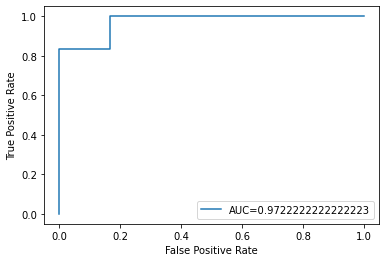

In [40]:
    classes_=[0,1]
    fpr, tpr, _ = skm.roc_curve(y_t,  pred_agg)
    auc = skm.roc_auc_score(y_t,  pred_agg)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [46]:
idx_te= np.where(adata1_c.isin (markers))[0]
len(idx_te)

65

In [47]:
XX = list(map(lambda x: (x[0].todense(), *x[1:]), Xtest))
gm2 = collections.defaultdict(list)
count_test2 = collections.defaultdict(int)
count_test2_s = []
Xtest_ = list(map(lambda x: (x[0][:,idx_te], *x[1:]), XX))
print(len(Xtest_))
for X, y, *_ in Xtest_:
        gm2['test'].append(X)
        count_test2[y] += 1   
        count_test2_s.append(X.shape[0])
for state in gm2:
        gm2[state] = np.concatenate(gm2[state])
        print(gm2[state].shape)

27
(48266, 65)


In [49]:
pred2=clf.decision_function(gm2['test'])
a= np.zeros(sum(count_test2_s[:count_test2[0]]))
y_true2=np.append(a,np.ones(sum(count_test2_s[count_test2[0]:])) )


In [55]:
pred_agg2=[]
y_t2=[]
for ii in range(len(count_test2_s)):
    if ii ==0:
        pred_agg2.append(np.mean(pred2[:count_test2_s[ii]]))
        y_t2.append(np.mean(y_true2[:count_test2_s[ii]]))

    else:
        print(count_test2_s[ii])
        iiii=ii-1
        iii = sum(count_test2_s[:ii])
        print(iii)
        pred_agg2.append(np.mean(pred2[iii:iii+count_test2_s[ii]]))
        y_t2.append(np.mean(y_true2[iii:iii+count_test2_s[ii]]))
        print("llllllllllllll")

1812
1191
llllllllllllll
932
3003
llllllllllllll
448
3935
llllllllllllll
2936
4383
llllllllllllll
629
7319
llllllllllllll
741
7948
llllllllllllll
2084
8689
llllllllllllll
2878
10773
llllllllllllll
875
13651
llllllllllllll
1302
14526
llllllllllllll
2524
15828
llllllllllllll
970
18352
llllllllllllll
1451
19322
llllllllllllll
938
20773
llllllllllllll
1132
21711
llllllllllllll
2371
22843
llllllllllllll
1777
25214
llllllllllllll
2992
26991
llllllllllllll
3394
29983
llllllllllllll
1829
33377
llllllllllllll
1132
35206
llllllllllllll
3288
36338
llllllllllllll
2823
39626
llllllllllllll
273
42449
llllllllllllll
1755
42722
llllllllllllll
3789
44477
llllllllllllll


In [56]:
pred_agg2

[0.23848861540967345,
 -0.24151027035076866,
 -0.034245794194791686,
 0.3754404213728857,
 -0.11150684386901112,
 0.08943368435558242,
 -0.06958276988040932,
 0.008825326100698517,
 0.052440570005974754,
 0.17460365013478177,
 -0.11652280596373461,
 0.15097798005311258,
 -0.000763583778828766,
 0.22568603922177718,
 0.028432779084002883,
 -0.20411381767193668,
 0.18645049064361294,
 -0.16735953330054654,
 -0.2929713044247218,
 0.1208541708632693,
 0.05403596008119617,
 0.09376561307391393,
 0.0197106617284843,
 -0.2944990417677424,
 -0.05600858796581874,
 -0.2626865907640068,
 -0.1514661649060238]

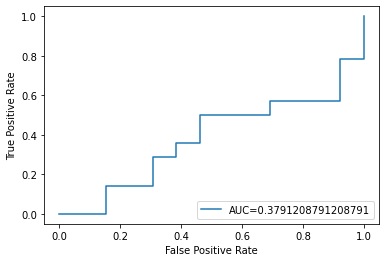

In [57]:
    classes_=[0,1]
    fpr, tpr, _ = skm.roc_curve(y_t2,  pred_agg2)
    auc = skm.roc_auc_score(y_t2,  pred_agg2)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [3]:
with open("../../2cohorts/chr2chr1/Call.pkl", "rb") as f:
            buf = pickle.load(f)

In [86]:
with open("../../2cohorts/chr2chr1/Ctest3.pkl", "rb") as f:
            but = pickle.load(f)

In [5]:
len(buf)

33417

In [87]:
len(but)

31279

In [8]:
markers= pd.read_csv('../scripts/marker_cohort2')
markers["avg_log2FC"] = np.abs(markers["avg_log2FC"])
set_clusters=np.unique(markers["cluster"])


In [10]:
print("get data")
df = markers.loc[markers["cluster"].isin(set_clusters),:]
feat_tab = df.groupby('cluster')
df2= feat_tab.apply(lambda x: x.sort_values(["avg_log2FC"], ascending=False)).reset_index(drop=True)
feat=df2.groupby('cluster').head(20)
print("data got")


get data
data got


In [28]:
len(np.where(feat.gene.isin(but) == True)[0])

AttributeError: 'numpy.ndarray' object has no attribute 'isin'

In [88]:
idx_te= np.where(but.isin(feat.gene.values))[0]

In [89]:
len(idx_te)

327

In [58]:
adata3 = sc.read_h5ad("../../data_/COVID19_ALL.h5ad")


AnnData object with n_obs × n_vars = 10648 × 31279
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2', 'clone_id', 'clone_id_by_size', 'isotype', 'lightchain', 'status', 'vdj_status', 'productive', 'umi_counts_heavy', 'umi_counts_light', 'v_call_heavy', 'v_call_light', 'j_call_heavy', 'j_call_light', 'c_call_heavy', 'c_call_light', 'clone_centrality', 'clone_degree', 'clone_id_size', 'mu_freq_heavy

In [34]:
sc.pp.normalize_total(adata3, target_sum=1e4)
sc.pp.log1p(adata3)

In [37]:
adata3_c=adata3.var.index
adata3_c

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS2',
       'A3GALT2', 'A4GALT', 'A4GNT',
       ...
       'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B',
       'ZYX', 'ZZEF1'],
      dtype='object', length=27943)

In [38]:
adata3_x=adata3.X

In [44]:
print(np.unique(adata3.obs["CoVID-19 severity"]))


['control' 'mild/moderate' 'severe/critical']


In [45]:
label = le.fit_transform(adata3.obs["CoVID-19 severity"])
label
label = label-1


In [50]:
#cohort1_xtest


Xtest = []
samples = np.unique(adata3.obs.sampleID[adata3.obs["CoVID-19 severity"] != 'control'])
X_ = []
print(len(samples))
for sample in samples:
    x = adata3_x[adata3.obs.sampleID == sample,:]
    y=label[adata3.obs.sampleID == sample][0] 
    y_= adata3.obs["Unpublished"][adata3.obs.sampleID == sample].values 
    X_.append((x,y,y_))
# X = list(map(lambda x: (x, y, None), X_))
Xtest=X_
with open("../../2cohorts/chr2chr1/Xtest2_all.pkl", "wb") as f:
            pickle.dump(Xtest, f)


256


NameError: name 'adata1_c' is not defined

In [51]:
with open("../../2cohorts/chr2chr1/Ctest2_all.pkl", "wb") as f:
            pickle.dump(adata3_c, f)

In [76]:
adata3 = sc.read_h5ad("../../data_/BCR_Mild.h5ad")
sc.pp.normalize_total(adata3, target_sum=1e4)
sc.pp.log1p(adata3)
adata3_c=adata3.var.index
adata3_x=adata3.X

In [77]:
#cohort1_xtest


Xtest = []
samples = np.unique(adata3.obs.sample_id)
X_ = []
print(len(samples))
for sample in samples:
    x = adata3_x
    y=0 
    y_= adata3.obs["sample_id"].values 
    X_.append((x,y,y_))
# X = list(map(lambda x: (x, y, None), X_))
# Xtest=X_
# with open("../../2cohorts/chr2chr1/Xtest2_all.pkl", "wb") as f:
#             pickle.dump(Xtest, f)


23


In [78]:
len(np.unique(adata4.obs['sample_id']))

13

In [79]:
adata4 = sc.read_h5ad("../../data_/BCR_Severe.h5ad")
sc.pp.normalize_total(adata4, target_sum=1e4)
sc.pp.log1p(adata4)
adata4_c=adata4.var.index
adata4_x=adata4.X

In [80]:
#cohort1_xtest
samples = np.unique(adata4.obs.sample_id)
print(len(samples))
for sample in samples:
    x = adata4_x
    y=1 
    y_= adata4.obs["sample_id"].values 
    X_.append((x,y,y_))
Xtest=X_
with open("../../2cohorts/chr2chr1/Xtest3_all.pkl", "wb") as f:
            pickle.dump(Xtest, f)


13


In [85]:
with open("../../2cohorts/chr2chr1/Ctest3_all.pkl", "wb") as f:
            pickle.dump(adata3_c, f)

In [68]:
adata4_c

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'AB_CD101', 'AB_IL21R', 'AB_C5AR1', 'AB_HLA-F', 'AB_NLRP2',
       'AB_Podocalyxin', 'AB_GGT1', 'AB_c-Met', 'AB_LIGHT', 'AB_DR3'],
      dtype='object', name='names', length=31279)

In [82]:
len(Xtest)

36

In [20]:
A= np.array([2,3,4])
newrow = [1, 2, 3]
A = np.vstack([A, newrow])

In [22]:
A.vstack([newrow])

AttributeError: 'numpy.ndarray' object has no attribute 'vstack'